In [3]:
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [5]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [6]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [7]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [8]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [9]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [10]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [11]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


## Adding some noise

In [12]:
x_train_noisy = x_train + np.random.normal(loc = 0.0, scale = 0.5, size = x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

x_test_noisy = x_test + np.random.normal(loc = 0.0, scale = 0.5, size = x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train_noisy.shape)
print(x_test_noisy.shape)

(50000, 3072)
(10000, 3072)


In [13]:
input_img = Input(shape = (3072, ))
encoded = Dense(units = 128, activation = 'relu')(input_img)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 32, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 3072, activation = 'tanh')(decoded)

In [14]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [15]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160

In [16]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160

In [17]:
autoencoder.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
autoencoder.fit(x_train_noisy, x_train_noisy, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test_noisy, x_test_noisy])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 161us/step - loss: 0.1424 - accuracy: 0.0013 - val_loss: 0.1334 - val_accuracy: 1.0000e-04
Epoch 2/50
50000/50000 [==============================] - 8s 156us/step - loss: 0.1326 - accuracy: 4.8000e-04 - val_loss: 0.1302 - val_accuracy: 0.0000e+00
Epoch 3/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.1299 - accuracy: 8.2000e-04 - val_loss: 0.1300 - val_accuracy: 0.0000e+00
Epoch 4/50
50000/50000 [==============================] - 12s 243us/step - loss: 0.1298 - accuracy: 2.8000e-04 - val_loss: 0.1293 - val_accuracy: 2.0000e-04
Epoch 5/50
50000/50000 [==============================] - 11s 221us/step - loss: 0.1282 - accuracy: 0.0015 - val_loss: 0.1279 - val_accuracy: 0.0000e+00
Epoch 6/50
50000/50000 [==============================] - 11s 222us/step - loss: 0.1278 - accuracy: 3.2000e-04 - val_loss: 0.1279 - val_accuracy: 2.0000e-04
Epoch 7/50
50000/50

In [18]:
encoded_test_data = encoder.predict(x_test_noisy)
predicted_test_data = autoencoder.predict(x_test_noisy)

In [19]:
encoded_test_data.shape

(10000, 32)

In [20]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [21]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 34)

In [22]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Denoised_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Denoising_Encoders_Test_RTAM.csv', index = False)

In [23]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : ship


In [24]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 8


In [25]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test_noisy)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [26]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [27]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance
73,8,ship,0.0,2.423490,0.0,0.0,0.0,2.516330,5.750570,2.851629,...,2.899286,0.000000,0.0,3.179387,0.0,0.0,0.0,0.0,1.000000,0.000000
9619,8,ship,0.0,2.638308,0.0,0.0,0.0,2.814687,6.319755,3.083079,...,2.603668,0.000000,0.0,3.480982,0.0,0.0,0.0,0.0,0.997411,0.002589
9814,8,ship,0.0,3.155074,0.0,0.0,0.0,3.199063,6.883255,2.906261,...,3.026883,0.000000,0.0,4.105647,0.0,0.0,0.0,0.0,0.997189,0.002811
4742,8,ship,0.0,2.278781,0.0,0.0,0.0,3.212156,5.635116,3.065969,...,2.746975,0.000000,0.0,3.217443,0.0,0.0,0.0,0.0,0.996987,0.003013
4595,9,truck,0.0,1.749378,0.0,0.0,0.0,1.865143,4.029922,2.119104,...,1.702447,0.000000,0.0,2.464703,0.0,0.0,0.0,0.0,0.996519,0.003481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,4,deer,0.0,1.009306,0.0,0.0,0.0,1.797909,1.302538,1.225505,...,2.437436,0.712308,0.0,1.740632,0.0,0.0,0.0,0.0,0.840035,0.159965
9801,6,frog,0.0,1.089702,0.0,0.0,0.0,1.489216,3.796138,0.619751,...,2.374951,0.000000,0.0,0.979415,0.0,0.0,0.0,0.0,0.839389,0.160611
1595,3,cat,0.0,1.893049,0.0,0.0,0.0,2.096120,1.272989,1.231608,...,2.068731,1.306174,0.0,5.628231,0.0,0.0,0.0,0.0,0.837717,0.162283
6656,6,frog,0.0,1.033455,0.0,0.0,0.0,1.991322,3.234732,0.629973,...,1.608055,0.000000,0.0,1.375870,0.0,0.0,0.0,0.0,0.837366,0.162634


In [28]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

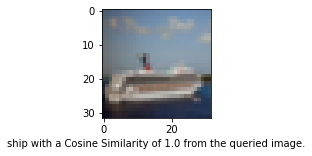

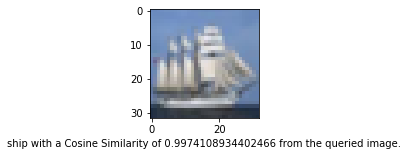

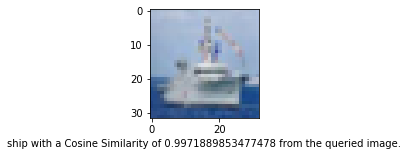

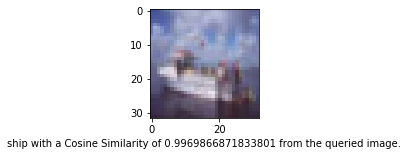

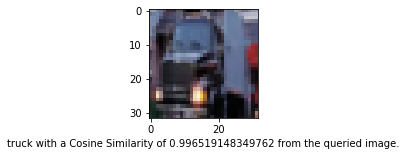

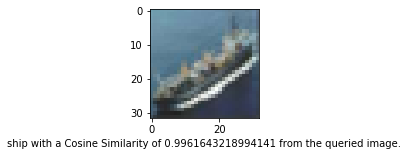

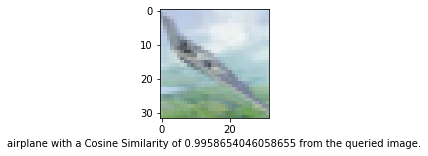

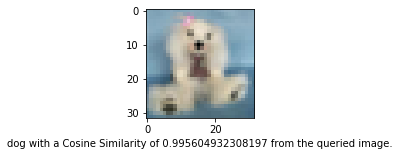

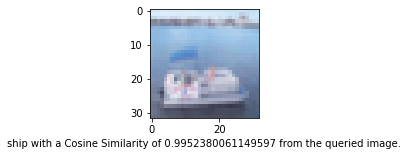

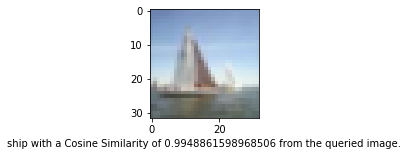

In [29]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [30]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [31]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance,Euclidean Distance
73,8,ship,0.0,2.423490,0.0,0.0,0.0,2.516330,5.750570,2.851629,...,0.0,0.0,3.179387,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
4742,8,ship,0.0,2.278781,0.0,0.0,0.0,3.212156,5.635116,3.065969,...,0.0,0.0,3.217443,0.0,0.0,0.0,0.0,0.996987,0.003013,0.856305
4955,2,bird,0.0,2.813127,0.0,0.0,0.0,1.795093,5.290190,2.859666,...,0.0,0.0,3.313895,0.0,0.0,0.0,0.0,0.994806,0.005194,1.141517
4271,1,automobile,0.0,2.045625,0.0,0.0,0.0,2.279942,5.549023,3.261391,...,0.0,0.0,3.364407,0.0,0.0,0.0,0.0,0.993302,0.006698,1.261942
9619,8,ship,0.0,2.638308,0.0,0.0,0.0,2.814687,6.319755,3.083079,...,0.0,0.0,3.480982,0.0,0.0,0.0,0.0,0.997411,0.002589,1.305462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,8,ship,0.0,3.162959,0.0,0.0,0.0,4.711321,7.169291,3.525975,...,0.0,0.0,6.348264,0.0,0.0,0.0,0.0,0.974539,0.025461,7.364845
9848,2,bird,0.0,3.216558,0.0,0.0,0.0,4.090710,7.203255,3.257225,...,0.0,0.0,6.490116,0.0,0.0,0.0,0.0,0.972884,0.027116,7.416131
9921,0,airplane,0.0,3.407528,0.0,0.0,0.0,4.053575,7.189600,3.727021,...,0.0,0.0,6.330639,0.0,0.0,0.0,0.0,0.978159,0.021841,7.473584
7835,0,airplane,0.0,1.892362,0.0,0.0,0.0,5.259849,6.453507,4.050606,...,0.0,0.0,7.564952,0.0,0.0,0.0,0.0,0.942359,0.057641,7.539982


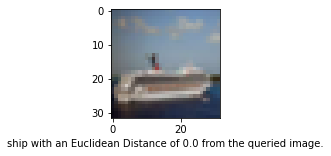

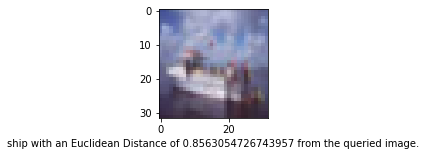

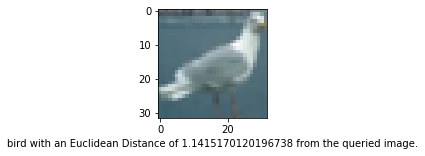

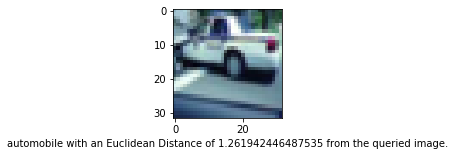

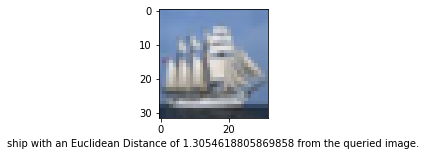

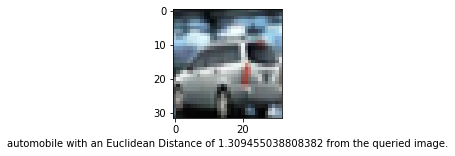

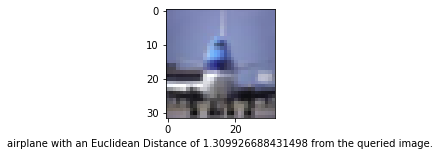

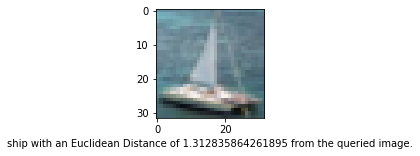

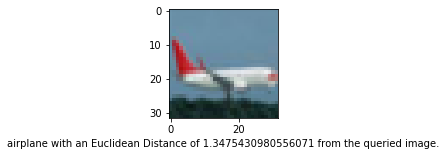

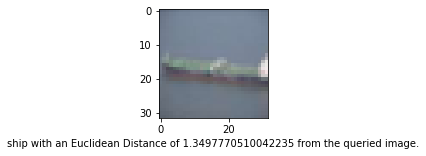

In [32]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()